## IRIS Multiple Shallow Classifiers Using End-to-end Template - CPU

## Introduction

This notebook illsutrates the _End-to-end ML project template based on 8 distinguishable steps_. 

>__Note:__ At the moment when the instructor demonstrates this notebook, you are still at LEVEL ZERO: you know only the theory of ML and you have not already set up your ML developement environment. Thus, don't worry if you don't understand all the concepts shown here. They will become clear progressively.

In this notebook, the titles of the sections represents the steps of the end-to-end (e2e) template.

## Step 1: Prepare your environment

__Step activities__

1. Create your ML dev ecosystem if it is not aldready done (see __Module-03 The AI Development Ecosystem__)
2. Create __this notebook:__ it is the core of the master piece of the environment 

## Step 2: Define and frame the problem

__Initial_request__

My boss ask me to __build a model that can predict the right variant of Iris flower, knowing the following data__: 
- sepal-length
- sepal-width
- petal-length
- petal-width

He provides me with the Iris dataset formatted as a CSV file: `Iris.csv`.

__Step activities__

- Framing the problem in terms of ML
- Import the right packages 
- Load dataset 


__Framing the problem in ML terms__

- Multiclass classification problem
- Possible classes: `Iris-setosa`, `Iris-versicolor`, `Iris-virginica`
- Size of dataset: very small
- Type of ML model: shallow because of the very small size  


__Import libs__

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

from pickle import dump, load

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

__Notebook parameters__

In [22]:
# NumPy

seed = 7 # for random generator
np.set_printoptions(linewidth=200) # to enlarge the print() line
np.random.seed(42) # the random seed init
np.set_printoptions(precision=3) # for numpy floats: number of decimals

__Globals & hyperparameters__

In [23]:
# =============
# IRIS Data
# =============

# on assieoussou (Laptop)
DATA_TOPDIR = "/home/ml/datasets/iris"

# on cocoti (Tour)
# DATA_TOPDIR = "/data/ml/datasets/iris"

IRIS_FILENAME = "Iris.csv"

# the total number of classes
num_classes = 3

# ==========================
# Model
# ==========================

MODEL_DIR = "/tmp"
MODEL_FILENAME = "iris-classifier.h5"

# display globals
DATA_TOPDIR, IRIS_FILENAME, num_classes, MODEL_DIR, MODEL_FILENAME

('/home/ml/datasets/iris', 'Iris.csv', 3, '/tmp', 'iris-classifier.h5')

In [24]:
# load the data into a Dataframe
col_names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "Species"]
dataset = pd.read_csv(os.path.join(DATA_TOPDIR, IRIS_FILENAME), names=col_names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 3: Summarize Data

__Step activities__

- Descriptive statistics
- Data visualizations

In [25]:
print(dataset.shape)

(150, 5)


In [26]:
# statistical summary
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
# class distribution => perfectly balanced (e.g. 33% per class)!
dataset.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

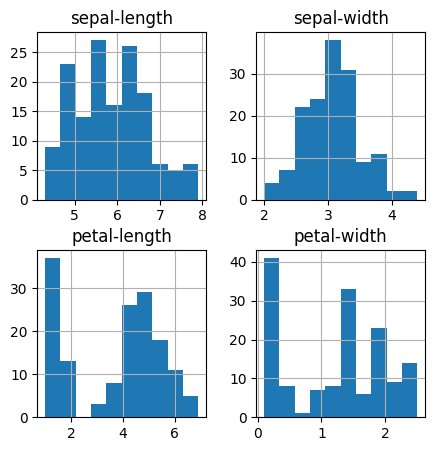

In [28]:
# data viz: univariate plots (e.g. plots of each individual variable) & histograms
dataset.hist(layout=(2,2), figsize=(5, 5))
plt.show()

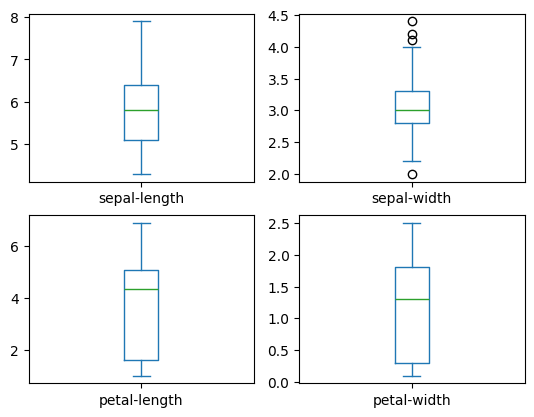

In [29]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

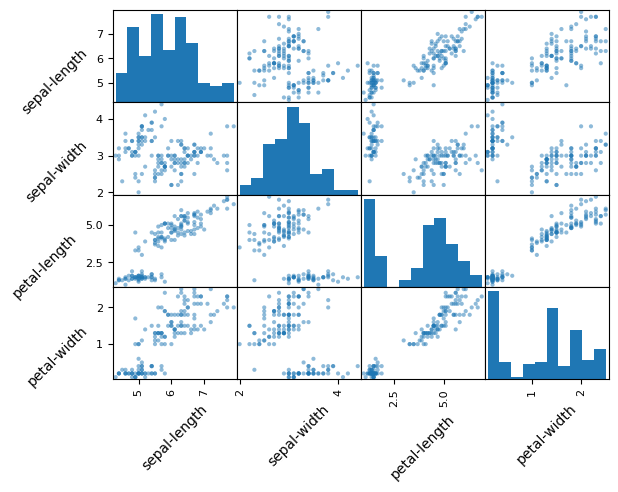

In [30]:
# Viz: multivariate plots 

# scatter plot matrix
axes = pd.plotting.scatter_matrix(dataset)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(45)
    ax.yaxis.label.set_ha('right')
plt.show()

__Interpretation__

The previous plots show that many features are __linearly separables__; thus, the classification problem will be easy to solve. It means that simple models and few data will suffice to do the job! 

## Step 4: Prepare the data

__Step activities__

- Data Cleaning
- Feature Selection
- Data Transformations


>__Note:__ There is nothing to do here for the two first activities, because the data is already in the right format for the shallow models.
>
> Indeed, the previous statistical summary indicates that there is no missing data, no outliers, no suspicious data, and so forth!  

In [31]:
# Data cleaning: N/A

In [32]:
# Feature selection: N/A

In [33]:
# Data transformations

# - NumPy array conversion
array = dataset.values

# - features vs labels split
X = array[:,0:4]
Y = array[:,4]
print("[INFO] feature matrix shape = ", X.shape)
print("[INFO] labels vector shape = ", Y.shape)

# - train vs test split
test_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print("[INFO] training dataset (X, Y) shape = ",X_train.shape, Y_train.shape)
print("[INFO] testing dataset (X, Y) shape = ",X_test.shape, Y_test.shape)

# display sample
print("[INFO] training data samples =>\n", X_train[:5], Y_train[:5])

[INFO] feature matrix shape =  (150, 4)
[INFO] labels vector shape =  (150,)
[INFO] training dataset (X, Y) shape =  (120, 4) (120,)
[INFO] testing dataset (X, Y) shape =  (30, 4) (30,)
[INFO] training data samples =>
 [[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1.0]
 [4.6 3.6 1.0 0.2]
 [6.9 3.1 5.4 2.1]
 [6.4 2.9 4.3 1.3]] ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor']


## Step 5: Evaluate algorithms and select the baseline model

__Step activities__

- Spot check algorithms
- Compare algorithms and select the best: the baseline

In [34]:
# Spot check algorithms: the models (Scikit-learn implementation)
models = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()), 
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

# evaluate each model in turn
# metric: accuracy
# evaluation method: K-fold cross-validation, with k = 10

results = []
names = []
for name, model in models:
    t1 = time.time()
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    t2 = time.time()
    print("[INFO] {}: mean acc. = {:.2f}%, std = (+/- {:.2f}), duration = {:.2f} seconds".format(name, cv_results.mean()*100, cv_results.std(), (t2-t1)))



[INFO] LR: mean acc. = 98.33%, std = (+/- 0.03), duration = 0.20 seconds
[INFO] LDA: mean acc. = 97.50%, std = (+/- 0.04), duration = 0.03 seconds
[INFO] KNN: mean acc. = 98.33%, std = (+/- 0.03), duration = 0.05 seconds
[INFO] CART: mean acc. = 95.00%, std = (+/- 0.08), duration = 0.03 seconds
[INFO] NB: mean acc. = 96.67%, std = (+/- 0.04), duration = 0.03 seconds
[INFO] SVM: mean acc. = 98.33%, std = (+/- 0.03), duration = 0.02 seconds


__Select the best model__ 

Since we have a a population of accuracy measures for each algorithm, we could create a plot of the model evaluation results and __compare the spread and the mean accuracy of each model__. 

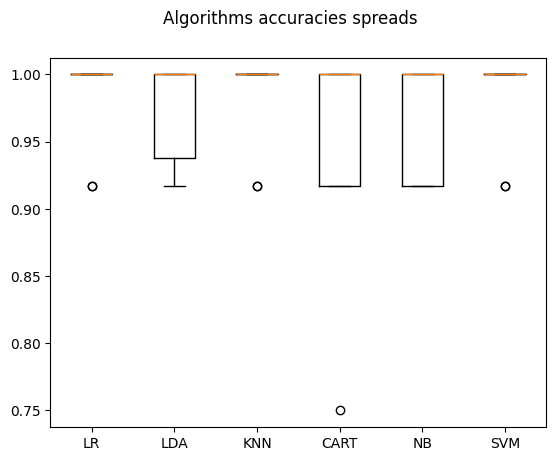

In [35]:
# Compare Algorithms & select the best
fig = plt.figure()
fig.suptitle('Algorithms accuracies spreads')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

__Interpretation__

Let us select __KNN__ as our bets model - even if wa could have chosen __LR__ or __SVM__. However, according the Occam's razor principle, we should always select the simplest of less fancy model among several ones with the same performances: __KNN__.


## Step 6: Improve accuracy

Here, use __algorithm tuning__ techniques to improve the __training accuracy__ of the mode to beat the baseline one of __98.33% (+/- 0.03)__.

__Step activities__
- Hyperparameter tuning using __Grid search cross-validation__
- Evaluate the resulting best model


In [36]:
# Grid Search for Algorithm Tuning

t1 = time.time()

# hyperparameters space
# Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']

n_neighbors_values = np.array([3, 4, 5, 6, 7], dtype=int) # default=5 
weights_values = np.array(["uniform", "distance"], dtype=str) # default="uniform"
algorithm_values = np.array(["auto", "ball_tree", "kd_tree", "brute"], dtype=str) # default="auto

# add more hyperparameters...

parameters_grid = dict(
    n_neighbors = n_neighbors_values,
    weights = weights_values,
    algorithm = algorithm_values
    # add more hyperparameters...
)

# build and fit the KNN model with the grid
model = KNeighborsClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=parameters_grid, cv=kfold)
grid.fit(X_train, Y_train)

t2 = time.time()

print("[INFO] GridSerchCV computed in {} seconds.".format(t2-t1))
print("[INFO] Best estimator score = ", grid.best_score_)
print("[INFO] Best estimator model = ", grid.best_estimator_)

# Assign the best_estimator_ as the final model
model = grid.best_estimator_


[INFO] GridSerchCV computed in 0.7297191619873047 seconds.
[INFO] Best estimator score =  0.9833333333333334
[INFO] Best estimator model =  KNeighborsClassifier(algorithm=np.str_('auto'), n_neighbors=np.int64(5),
                     weights=np.str_('uniform'))


## Step 7: Finalize the model

__Step activities__
- Train an all available training data
- Evaluate of the testing data
- Save model for later use

In [37]:
# (re)fit from scratch on full training dataset
model.fit(X_train, Y_train)

# evaluate on testing
predictions = model.predict(X_test)
print("[INFO] accuracy_score = %0.2f%%" % (accuracy_score(Y_test, predictions) * 100))
print("[INFO] confusion_matrix = \n", confusion_matrix(Y_test, predictions))
print("[INFO] classification_report = \n", classification_report(Y_test, predictions))

[INFO] accuracy_score = 90.00%
[INFO] confusion_matrix = 
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
[INFO] classification_report = 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [38]:
# Save the model on disk
dump(model, open(os.path.join(MODEL_DIR, MODEL_FILENAME), 'wb'))
print("[INFO] Saved model as {}".format(os.path.join(MODEL_DIR, MODEL_FILENAME))) 

[INFO] Saved model as /tmp/iris-classifier.h5


## Extra: Load the model from disk and predict something

In [42]:
ficname = os.path.join(MODEL_DIR, MODEL_FILENAME)
assert os.path.exists(ficname), f"[ERROR] The model file name should be = {ficname}"

loaded_model = load(open(ficname, 'rb'))
x = np.array([[4.6, 3.6, 1.0, 0.2]])   # should be y = Iris-setosa
prediction = loaded_model.predict(x)
print("[INFO] prediction = ", prediction)

[INFO] prediction =  ['Iris-setosa']


__END OF NOTEBOOK.__